In [2]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib import rcParams
import skimage

## Left Camera Calibration

55


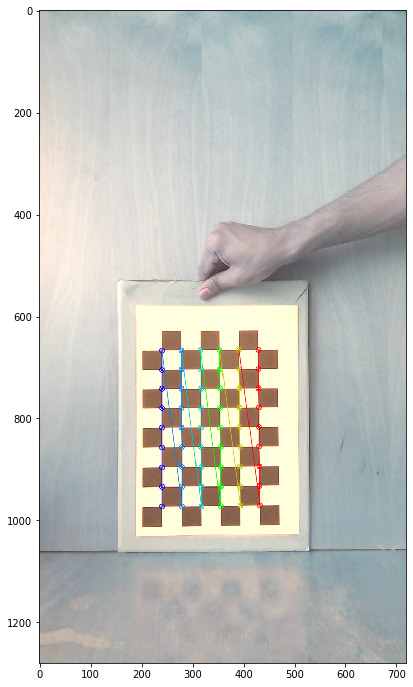

In [122]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) * 0.022

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_l = [] # 2d points in image plane.

images = glob.glob('./left-better-1/*.jpg')
#images = glob.glob('/home/moizsajid/opencv/samples/data/left02.jpg')

count = 0

for fname in images:
    
    img = cv2.imread(fname)
    #print(img.shape)
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE);
    #print(img.shape)
    #plt.imshow(img)
    #break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), flags=(cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_NORMALIZE_IMAGE))
    #ret, corners = cv2.findCirclesGrid(gray, (6,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        count += 1
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints_l.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9, 6), corners2, ret)
        #plt.figure(figsize=(16,12))
        plt.imshow(img)
        cv2.imwrite('corners.jpg', img)
        #plt.figure()
        
print(count)

In [123]:
ret, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera(objpoints, imgpoints_l, gray.shape[::-1],None,None)

In [124]:
img = cv2.imread('./left-better-1/2019-07-21-163347.jpg')
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE);
h, w = img.shape[:2]
print(h, w)
newcameramtx_left, roi=cv2.getOptimalNewCameraMatrix(mtx1, dist1, (w,h), 1, (w, h))

1280 720


Save matrics text file
Undisort the input images
Downsample the image
Rectify the input images

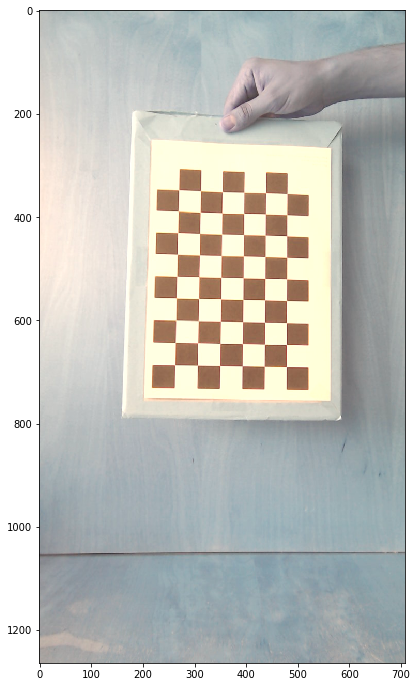

In [125]:
# undistort
dst = cv2.undistort(img, mtx1, dist1, None, newcameramtx_left)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

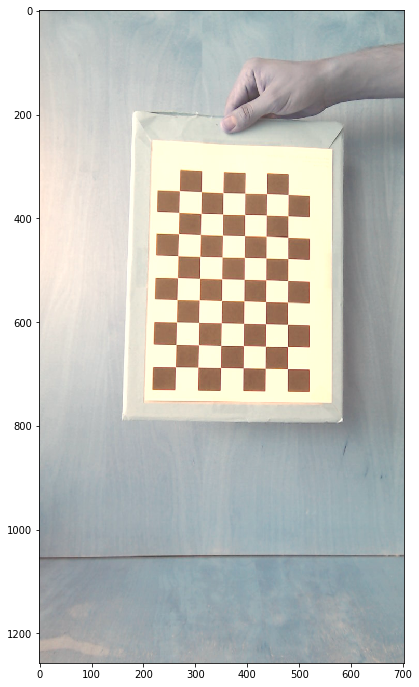

In [126]:
# undistort
mapx, mapy = cv2.initUndistortRectifyMap(mtx1, dist1, None, newcameramtx_left, (w,h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(16, 12))
plt.imshow(dst)

In [127]:
mean_error = 0

for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs1[i], tvecs1[i], mtx1, dist1)
    error = cv2.norm(imgpoints_l[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print("total error: ", mean_error/len(objpoints))

total error:  0.07473212950840649


In [110]:
import os
import glob

files  = glob.glob('./right-better/*.jpg')

In [111]:
i = 1

for file in files:
    os.rename(file, './right-better/right' + str(i) + '.jpg')
    i += 1

## Right Camera Calibration

55


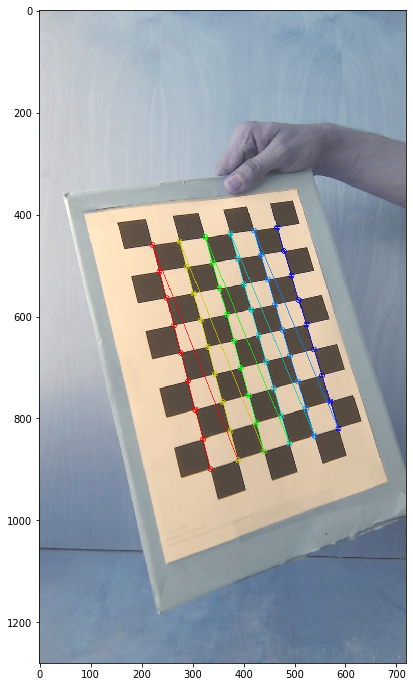

In [129]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 22, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32) * 22.0
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_r = [] # 2d points in image plane.

images = glob.glob('./right-better-1/*.jpg')
#images = glob.glob('/home/moizsajid/opencv/samples/data/left02.jpg')

count = 0

for fname in images:
    img = cv2.imread(fname)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE);
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    #ret, corners = cv2.findCirclesGrid(gray, (6,6), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        count += 1
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints_r.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9, 6), corners2, ret)
        plt.imshow(img)
        #plt.figure()
        
print(count)

In [130]:
ret, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints, imgpoints_r, gray.shape[::-1],None,None)

In [132]:
img = cv2.imread('./right-better-1/2019-07-21-164815.jpg')
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE);
h,  w = img.shape[:2]
print(h, w)
newcameramtx_right, roi=cv2.getOptimalNewCameraMatrix(mtx2,dist2,(w,h),1,(w,h))

1280 720


15 21 697 1239


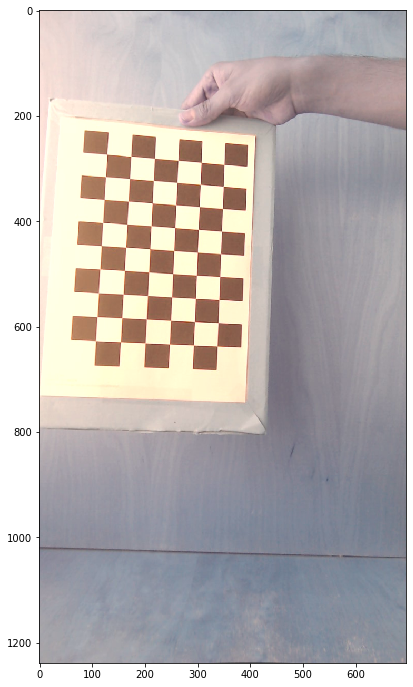

In [133]:
# undistort
dst = cv2.undistort(img, mtx2, dist2, None, newcameramtx_right)

# crop the image
x,y,w,h = roi
print(x,y,w,h)
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

In [134]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs2[i], tvecs2[i], mtx2, dist2)
    error = cv2.norm(imgpoints_r[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print("total error: ", mean_error/len(objpoints))

total error:  0.07335677777324838


In [135]:
print(newcameramtx_left)

[[930.04052734   0.         353.75734512]
 [  0.         931.65527344 633.84417384]
 [  0.           0.           1.        ]]


In [188]:
dist1

array([[ 1.39169826e-01, -5.13185614e-01, -1.90417645e-03,
         2.80508085e-04,  5.73013894e-01]])

In [136]:
print(newcameramtx_right)

[[903.25213623   0.         384.93938592]
 [  0.         896.62097168 639.9703307 ]
 [  0.           0.           1.        ]]


In [189]:
dist2

array([[ 0.08464559, -0.06763524,  0.00085903,  0.00293783, -0.14124984]])

In [190]:
1.39169826e-01

0.139169826

# Left and Right Camera Intrinsics

In [76]:
#baseline = 5.7
baseline = 100

newcameramtx_left = np.array([[930.04052734,   0.0,         353.75734512],
 [  0.0,         931.65527344, 633.84417384],
 [  0.0           0.0,           1.0        ]])

newcameramtx_right = np.array([[903.25213623,   0.0,         384.93938592],
 [  0.0,         896.62097168, 639.9703307 ],
 [  0.0,           0.0,           1.0        ]])

dist1 = np.array([[ 1.39169826e-01, -5.13185614e-01, -1.90417645e-03, 2.80508085e-04,  5.73013894e-01]])

dist2 = np.array([[ 0.08464559, -0.06763524,  0.00085903,  0.00293783, -0.14124984]])

# Stereo Rectification Calibrated

In [79]:
stereocalibration_retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_l, imgpoints_r, newcameramtx_left, dist1, newcameramtx_right, dist2, (1536, 2304), flags=cv2.CALIB_FIX_INTRINSIC)

In [80]:
print(stereocalibration_retval)

180.99570254149594


In [81]:
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(
    cameraMatrix1=cameraMatrix1,
    distCoeffs1=distCoeffs1,
    cameraMatrix2=cameraMatrix2,
    distCoeffs2=distCoeffs2,
    imageSize=(1536, 2304),
    R=R,
    T=T,
    flags=cv2.CALIB_ZERO_DISPARITY,
    alpha=1)

map1x, map1y = cv2.initUndistortRectifyMap(
    cameraMatrix=cameraMatrix1,
    distCoeffs=distCoeffs1,
    R=R1,
    newCameraMatrix=P1,
    size=(1536, 2304),
    m1type=cv2.CV_32FC1)

map2x, map2y = cv2.initUndistortRectifyMap(
    cameraMatrix=cameraMatrix2,
    distCoeffs=distCoeffs2,
    R=R2,
    newCameraMatrix=P2,
    size=(1536, 2304),
    m1type=cv2.CV_32FC1)

In [82]:
print(P1)
print(P2)

[[773.88444331   0.         724.89331055   0.        ]
 [  0.         773.88444331 752.11166      0.        ]
 [  0.           0.           1.           0.        ]]
[[ 7.73884443e+02  0.00000000e+00  7.24893311e+02  0.00000000e+00]
 [ 0.00000000e+00  7.73884443e+02  7.52111660e+02 -1.02845725e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]


In [83]:
img_1 = cv2.imread('../datasets/4_l.jpg')
img_2 = cv2.imread('../datasets/4_r.jpg')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [89]:
img1_rect = cv2.remap(img_1, map1x, map1y, cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_CONSTANT)
img2_rect = cv2.remap(img_2, map2x, map2y, cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_CONSTANT)

In [88]:
print(img_1.shape)
print(img_2.shape)

(2304, 1536)
(2304, 1536)


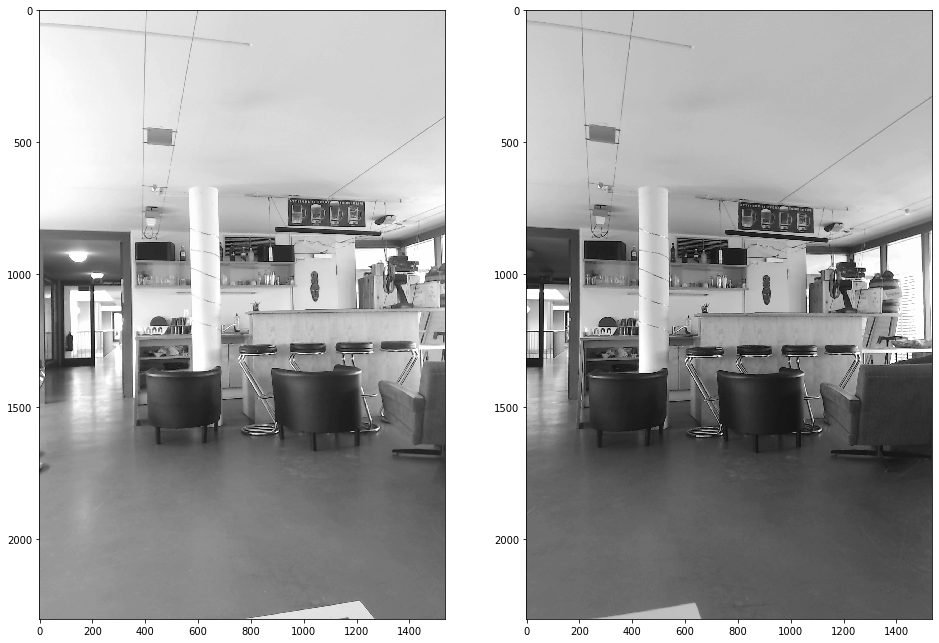

In [87]:
rcParams['figure.figsize'] = 16 ,12

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_1, cmap='gray')
axarr[1].imshow(img_2, cmap='gray')

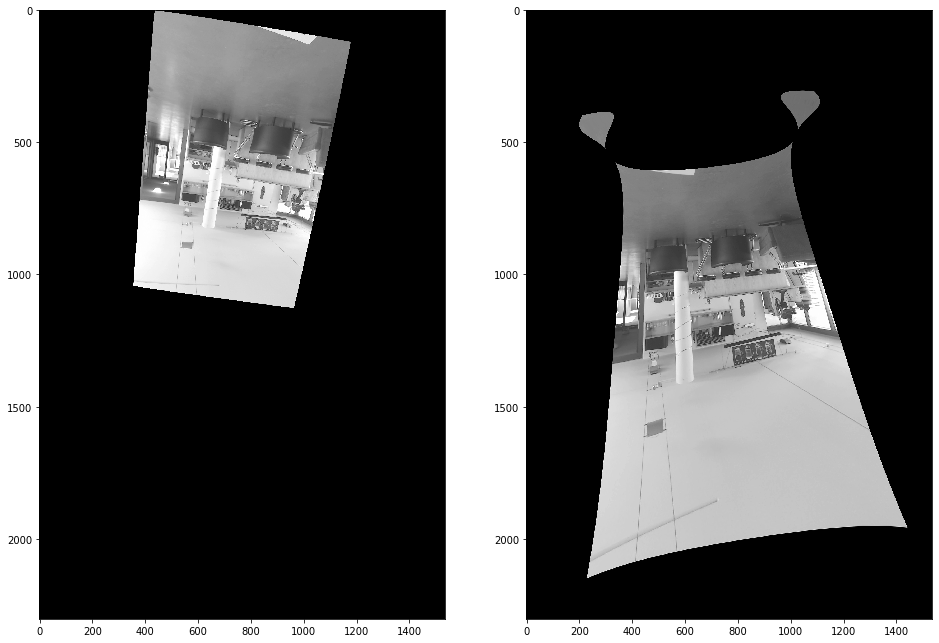

In [90]:
rcParams['figure.figsize'] = 16 ,12

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1_rect, cmap='gray')
axarr[1].imshow(img2_rect, cmap='gray')

#  Stereo Rectify Uncalibrated

In [164]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1_color = cv2.imread('../datasets/2_l.jpg') #queryimage # left image
img2_color = cv2.imread('../datasets/2_r.jpg') #trainimage # right image

img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

#img1 = cv2.imread('datasets/ours/left_1.jpg',0)
#img2 = cv2.imread('datasets/ours/right_1.jpg',0)

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.4*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [165]:
len(pts1)
len(pts2)

96

In [166]:
cameraMatrix1 = newcameramtx_left
cameraMatrix2 = newcameramtx_right

distCoeffs1 = dist1
distCoeffs2 = dist2

In [167]:
pts1_np = np.array(pts1)
pts2_np = np.array(pts2)

In [168]:
F, _ = cv2.findFundamentalMat(pts1_np, pts2_np, cv2.FM_RANSAC)

In [169]:
res, H1, H2 = cv2.stereoRectifyUncalibrated(pts1_np, pts2_np, F, (720, 1280))

In [170]:
K1_inverse = np.linalg.inv(cameraMatrix1)
K2_inverse = np.linalg.inv(cameraMatrix2)

R1 = K1_inverse.dot(H1).dot(cameraMatrix1)
R2 = K2_inverse.dot(H2).dot(cameraMatrix2)

mapx1, mapy1 = cv2.initUndistortRectifyMap(cameraMatrix1, distCoeffs1, R1, cameraMatrix1, (720, 1280), cv2.CV_16SC2)
mapx2, mapy2 = cv2.initUndistortRectifyMap(cameraMatrix2, distCoeffs2, R2, cameraMatrix2, (720, 1280), cv2.CV_16SC2)

In [171]:
#palette1 = set(img1.flatten())
#palette2 = set(img2.flatten())

#colours = set(range(256))

#key1 = colours.difference(palette1).pop()
#key2 = colours.difference(palette2).pop()

rectified1 = cv2.remap(img1_color, mapx1, mapy1, interpolation= cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_CONSTANT)
rectified2 = cv2.remap(img2_color, mapx2, mapy2, interpolation= cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_CONSTANT)

In [181]:
def remove_black_region(img_color):
    
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    h, w = img.shape
    x1, x2, y1, y2 = (0,0,0,0)

    # Color threshold of the void part
    void_th = 5

    # List of colors in the vertical an horizontal lines that cross the image in the middle
    vertical = [img[i, int(w/2)] for i in range(h)]
    horizontal = [img[int(h/2), i] for i in range(w)]

    # Reverses both lists
    vertical_rev = vertical[::-1]
    horizontal_rev = horizontal[::-1]

    # Looks when the change of color is done
    for i in range(2,h):
        if vertical[i] > void_th and y1 == 0:
            y1 = i
        if vertical_rev[i] > void_th and y2 == 0:
            y2 = i
        if y1 != 0 and y2 != 0:
            break
    for i in range(2,w):
        if horizontal[i] > void_th and x1 == 0:
            x1 = i
        if horizontal_rev[i] > void_th and x2 == 0:
            x2 = i
        if x1 != 0 and x2 != 0:
            break

    desired_result = img_color[y1:h-y2, x1:w-x2]
    return desired_result

rectified1 = remove_black_region(rectified1)
rectified2 = remove_black_region(rectified2)

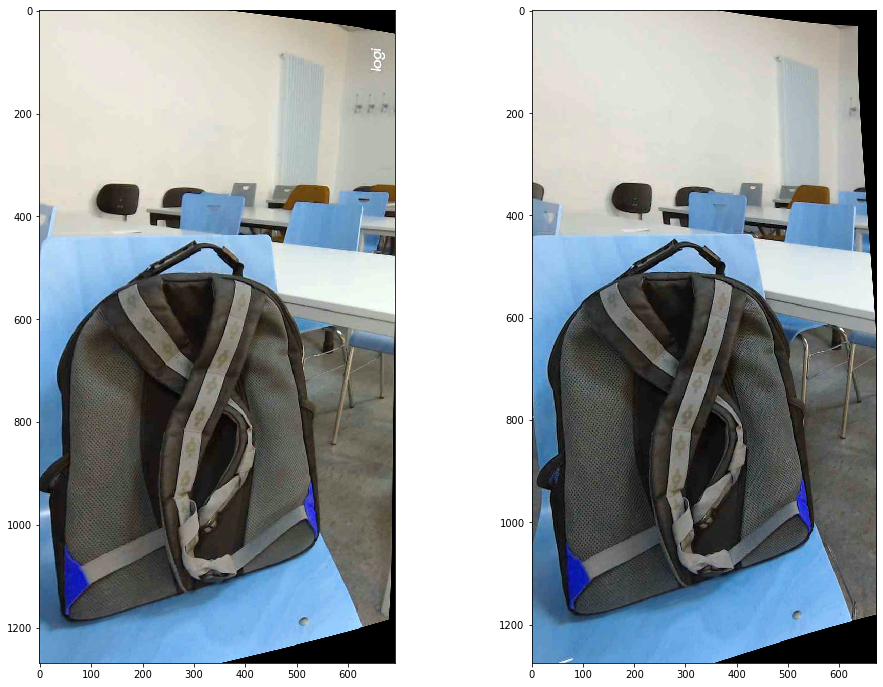

In [183]:
rcParams['figure.figsize'] = 16 ,12


f, axarr = plt.subplots(1,2)
axarr[0].imshow(rectified1)
axarr[1].imshow(rectified2)

In [184]:
cv2.imwrite('rectified1.jpg', rectified1)
cv2.imwrite('rectified2.jpg', rectified2)

True

# Epipolar Lines

In [10]:
img1 = cv2.imread('./rectified1.jpg', 0)  #queryimage # left image
img2 = cv2.imread('./rectified2.jpg', 0) #trainimage # right image

#img1 = cv2.imread('../datasets/2_l.jpg', 0)  #queryimage # left image
#img2 = cv2.imread('../datasets/2_r.jpg', 0) #trainimage # right image

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.3*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [11]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

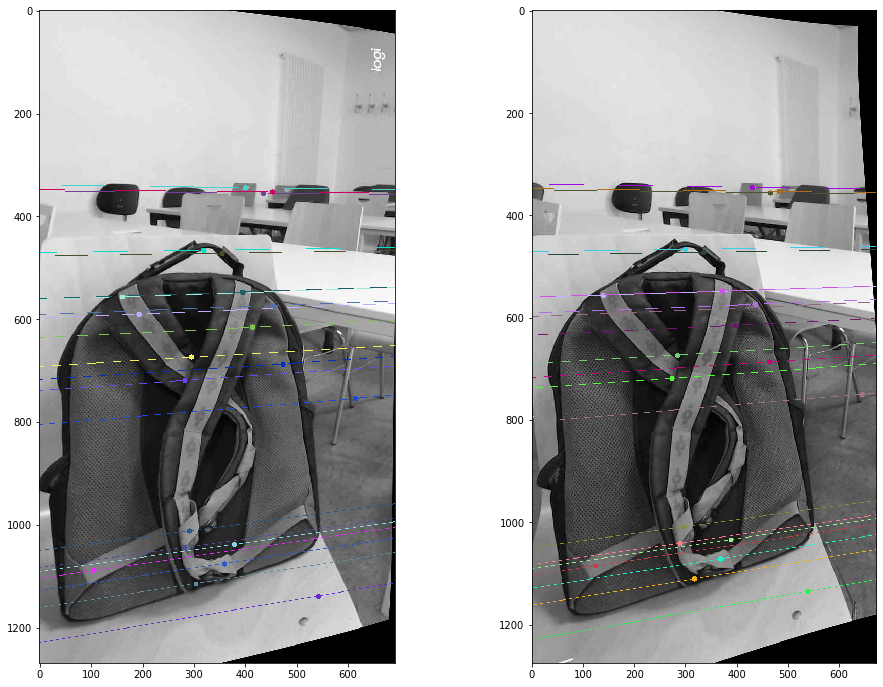

In [12]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

# Image Alignment using Homography Matrix

In [475]:
from __future__ import print_function
import cv2
import numpy as np
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
def alignImages(im1, im2):
 
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))

    return im1Reg, h

In [476]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)
imReference = cv2.imread('../datasets/l_1.jpg', cv2.IMREAD_COLOR)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align : ", imFilename);  
im = cv2.imread('../datasets/r_1.jpg', cv2.IMREAD_COLOR)

print("Aligning images ...")
# Registered image will be resotred in imReg. 
# The estimated homography will be stored in h. 
imReg, h = alignImages(im, imReference)

Reading reference image :  form.jpg
Reading image to align :  scanned-form.jpg
Aligning images ...
Saving aligned image :  aligned.jpg
Estimated homography : 
 [[ 9.41263339e-01 -2.05571951e-02  6.67592999e+01]
 [-1.56293390e-02  9.99438216e-01  7.25922914e-01]
 [-4.92995461e-05  2.10939378e-05  1.00000000e+00]]


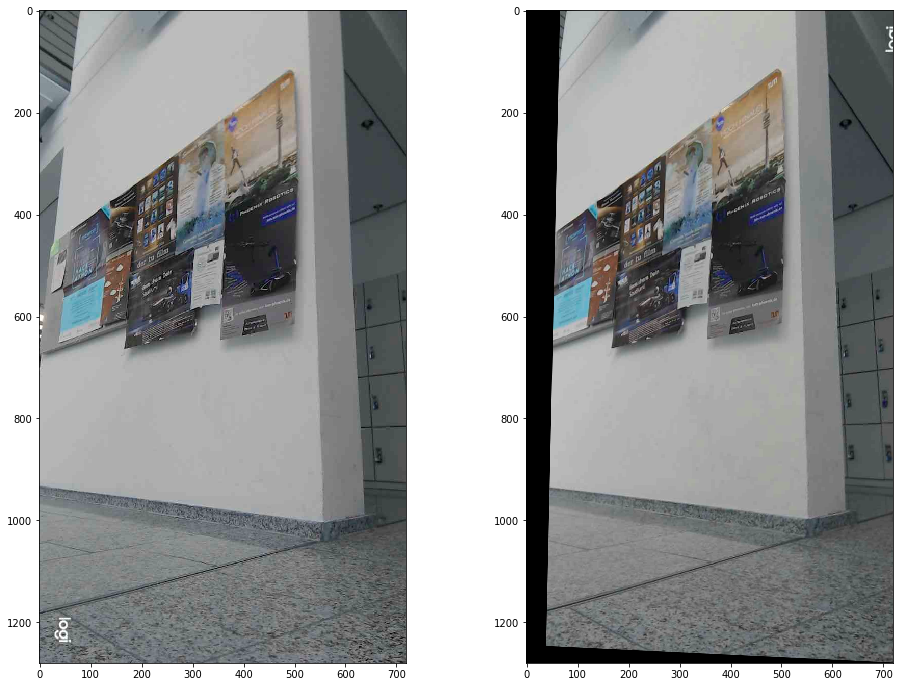

<Figure size 1152x864 with 0 Axes>

In [484]:
rcParams['figure.figsize'] = 16 ,12


f, axarr = plt.subplots(1,2)
plt.figure(figsize=(16,12))
axarr[0].imshow(imReference)
axarr[1].imshow(imReg)